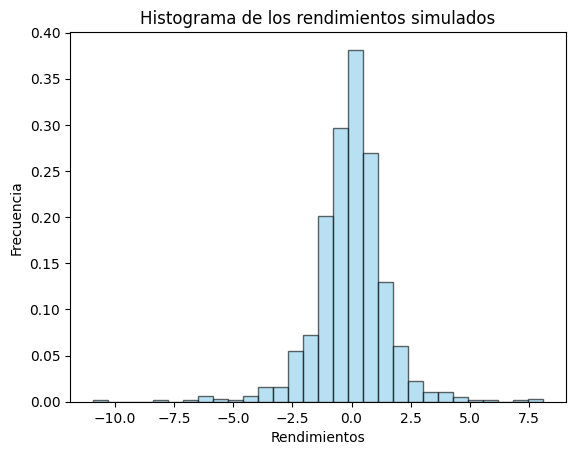

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
nct,0.019917,1019.582868,1039.213889,inf,0.014475,0.982910
jf_skew_t,0.020074,1018.766258,1038.397279,inf,0.014179,0.986278
genhyperbolic,0.020520,1018.821487,1043.360263,inf,0.015263,0.971213
johnsonsu,0.020652,1024.363460,1043.994481,inf,0.017056,0.928233
t,0.021494,1023.531017,1038.254283,inf,0.018782,0.865450


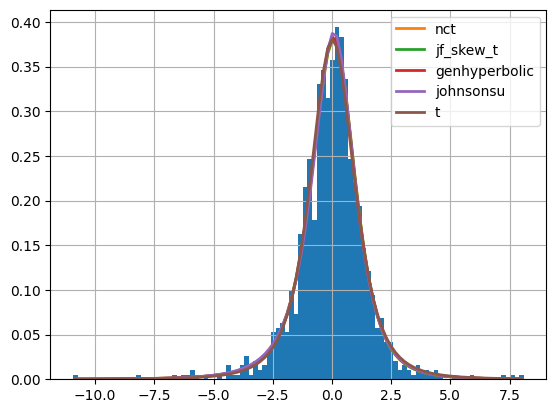

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from scipy import stats

# Simulamos un conjunto de datos complejo con colas gruesas utilizando una distribución t-Student
np.random.seed(42)
data = stats.t.rvs(df=3, loc=0, scale=1, size=1000)

# Visualizamos los datos
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title('Histograma de los rendimientos simulados')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.show()

# Usamos fitter para encontrar la mejor distribución
f = Fitter(data)
f.fit()
f.summary(plot=True)


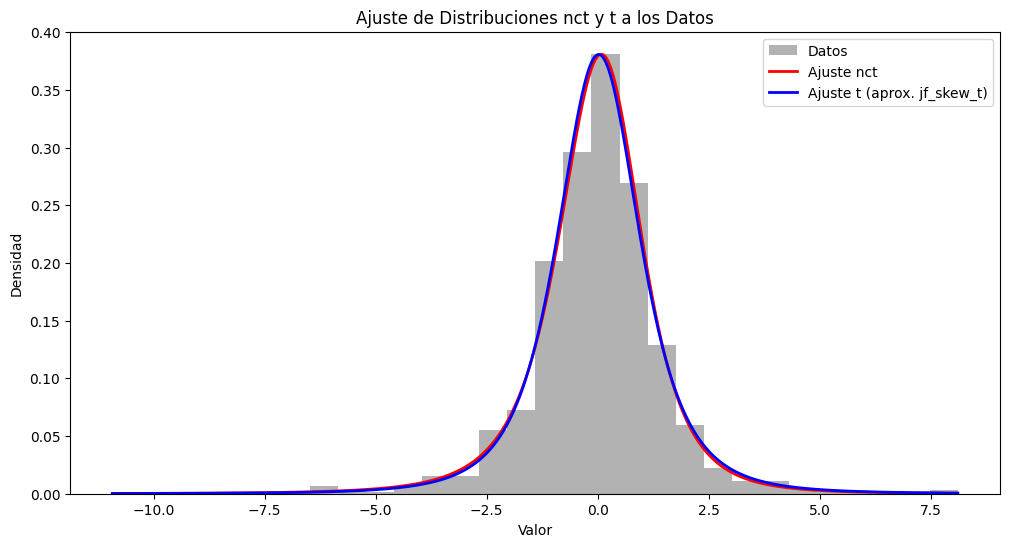

Parámetros de la distribución nct: (3.1963553997047938, -0.22002778786468463, 0.2547544835451905, 0.9669298552595385)
Parámetros de la distribución t (aprox. jf_skew_t): (3.186433620451603, 0.019619610494938915, 0.9699432827435732)


In [2]:
# 1: Ajustar la distribución `nct`
params_nct = stats.nct.fit(data)

# 2: Ajustar la distribución `t` como un aproximado de `jf_skew_t`
# (en scipy.stats no existe jf_skew_t, pero podemos comparar con `t`)
params_t = stats.t.fit(data)

# 3: Generar la densidad ajustada para cada distribución
x = np.linspace(min(data), max(data), 1000)
pdf_nct = stats.nct.pdf(x, *params_nct)
pdf_t = stats.t.pdf(x, *params_t)

# 4: Graficar el histograma de los datos y las curvas de densidad ajustadas
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Datos')
plt.plot(x, pdf_nct, 'r-', lw=2, label='Ajuste nct')
plt.plot(x, pdf_t, 'b-', lw=2, label='Ajuste t (aprox. jf_skew_t)')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de Distribuciones nct y t a los Datos')
plt.legend()
plt.show()

# Parámetros de cada distribución
print("Parámetros de la distribución nct:", params_nct)
print("Parámetros de la distribución t (aprox. jf_skew_t):", params_t)


In [ ]:
import pytensor
import pymc as pm

# Asegúrate de que 'data' contenga tus datos reales
# data = np.random.normal(0, 1, size=1000)  # Reemplaza con tus datos

# Paso 1: Definir el modelo bayesiano para la distribución `nct`
with pm.Model() as model_nct:
    # Definir priors para los parámetros de `nct`
    df = pm.HalfNormal('df', sigma=10)  # Grados de libertad
    loc = pm.Normal('loc', mu=0, sigma=10)  # Media
    scale = pm.HalfNormal('scale', sigma=10)  # Escala
    
    # Definir la función de probabilidad
    likelihood_nct = pm.StudentT('nct_likelihood', nu=df, mu=loc, sigma=scale, observed=data)
    
    # Paso 2: Muestreo para estimar los parámetros
    trace_nct = pm.sample(2000, chains=2, return_inferencedata=True)

# Paso 3: Definir el modelo bayesiano para la distribución `t`
with pm.Model() as model_t:
    # Priors para los parámetros de `t`
    df_t = pm.HalfNormal('df', sigma=10)
    loc_t = pm.Normal('loc', mu=0, sigma=10)
    scale_t = pm.HalfNormal('scale', sigma=10)
    
    # Función de probabilidad para `t`
    likelihood_t = pm.StudentT('t_likelihood', nu=df_t, mu=loc_t, sigma=scale_t, observed=data)
    
    # Muestreo para estimar los parámetros
    trace_t = pm.sample(2000, chains=2, return_inferencedata=True)

# Paso 4: Comparar modelos utilizando el WAIC (criterio de información de Akaike)
waic_nct = pm.waic(trace_nct, model_nct)
waic_t = pm.waic(trace_t, model_t)

print("WAIC para el modelo `nct`:", waic_nct.waic)
print("WAIC para el modelo `t`:", waic_t.waic)

# Paso 5: Visualizar los trazados para los parámetros
pm.plot_trace(trace_nct)
pm.plot_trace(trace_t)
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [df, loc, scale]


c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')